
**NAME** : Abhishek Mali

**PRN** : 240840128003

**DATE** : 22/11/2024

In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [ ]:


RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE)

NOISE = 0.2
EPOCHS = 1000
ALPHA = 0.1
N_SAMPLES = 1000

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')

In [ ]:
X, y = datasets.make_moons(n_samples=N_SAMPLES,
                           shuffle=True,
                           noise= NOISE,
                           random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0]))

In [ ]:
data_df = pd.DataFrame(X, columns = ['A', 'B'])

data_df['target'] = y

data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [ ]:
data_df.describe()

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


In [ ]:

data_df.target.unique()

array([0, 1])

In [ ]:
data_train, data_test = data_df.to_numpy()[:900], data_df.to_numpy()[900:]

In [ ]:
data_train.shape, data_test.shape

((900, 3), (100, 3))

In [ ]:
type(data_train)

numpy.ndarray

In [ ]:
data_train[0]

array([0.90633951, 0.90267624, 0.        ])

In [ ]:
rng.random(data_train.shape[1])


array([0.33026884, 0.40517732, 0.57473782])

In [ ]:
def fn_sigmoid(z : np.ndarray)-> np.ndarray:

    return 1 / ( 1 + np.exp ( -z ) )

In [ ]:
def predict (row, weights):

    z = weights[0]

    for i in range (len(row) -1 ):
        z += weights[i+1] * row[i]
    return fn_sigmoid(z)

In [ ]:
wgts = np.array([0.1, 2.0, 1,0])

predict(data_train[0], wgts)

0.9434999754763397

In [ ]:
def train_weights(train, n_epochs, alpha):
    errors = []
    weights = rng.random(train.shape[1])
    m = train.shape[0]
    for epoch in range(n_epochs):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            dz = prediction - row[-1]
            sum_error += - row[-1]*np.log(prediction)
            weights[0] =  weights[0] - alpha * dz / m
            for i in range(len(row)-1):
                weights[i+1] = weights[i+1] - alpha * dz * row[i]/m
        errors.append(sum_error/m)
    return errors, weights

In [ ]:
errors, weights = train_weights(data_train, EPOCHS, ALPHA)

In [ ]:
weights

array([ 0.26959025,  1.18559632, -3.70088453])

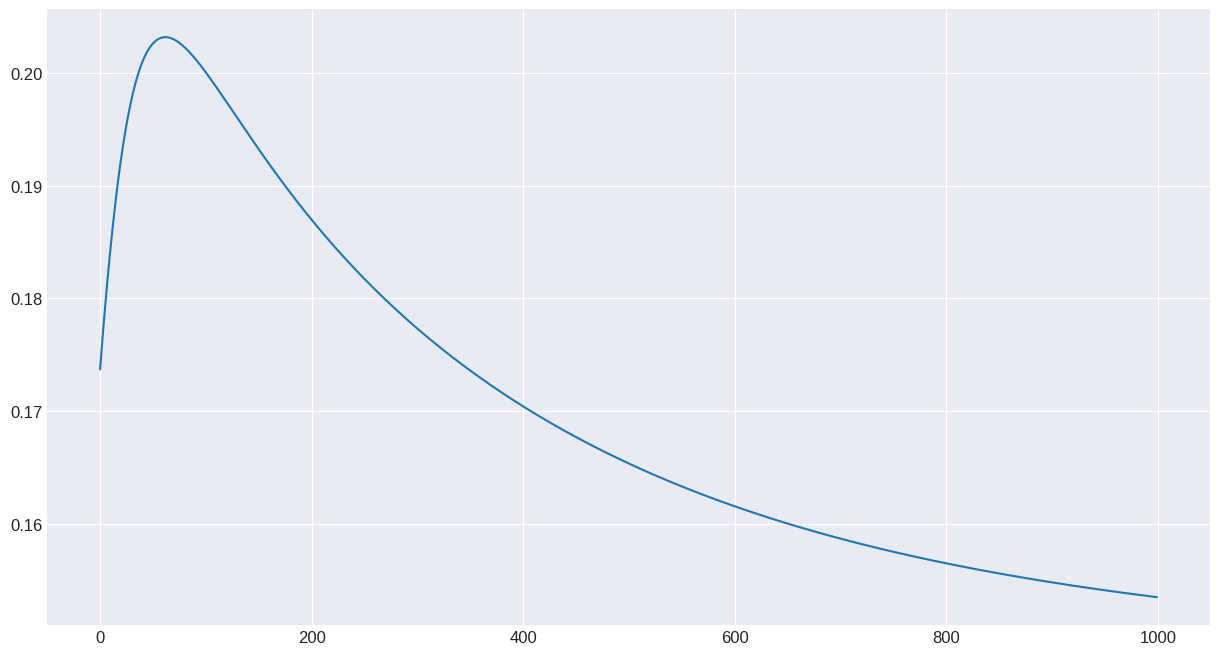

In [ ]:
ax = plt.plot(errors)

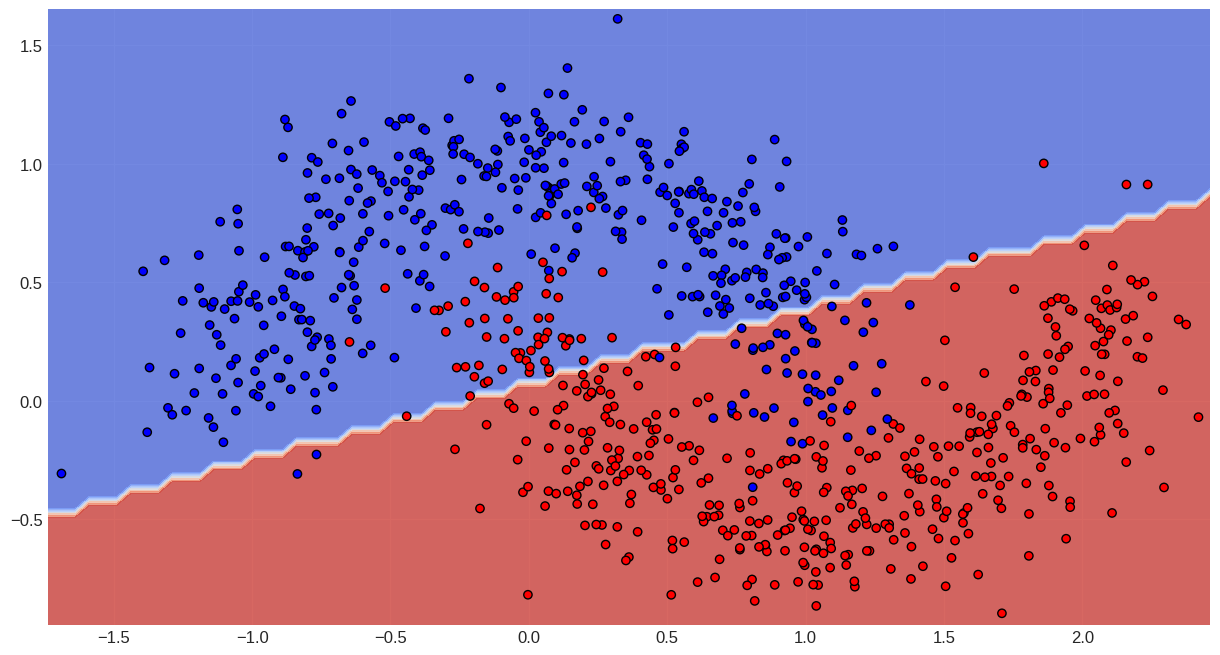

In [ ]:
X = data_train
fig, ax = plt.subplots()
dm = 0.05
x_min, x_max = X[:, 0].min() - 0.05 ,X[:, 0].max() + 0.05
y_min, y_max = X[:, 1].min() - 0.05 ,X[:, 1].max() + 0.05
xx,yy = np.meshgrid(np.arange(x_min, x_max, dm),
                    np.arange(y_min, y_max, dm))
XX = np.c_[xx.ravel(), yy.ravel()]
XX = np.hstack((XX, np.ones((XX.shape[0], 1))))
y_pred = []
for row in XX:
    pred = predict(row, weights)
    y_p = 1 if pred >= 0.5 else 0
    y_pred.append(y_p)
Z = np.array(y_pred).reshape(xx.shape)
ax.contourf(xx,yy, Z, cmap=CMAP, alpha = 0.8)
ax.scatter(X[:, 0], X[:, 1], c = X[:,2],
           edgecolors='k',
           cmap = plt.cm.bwr)

In [ ]:
predictions = []

for row in data_train:

    pred = predict(row, weights)
    y_p = 1 if pred >= 0.5 else 0
    predictions.append(y_p)

accuracy_score(data_train[:, -1], predictions)

0.8633333333333333

In [ ]:
predictions = []

for row in data_test:

    pred = predict(row, weights)

    y_p = 1 if pred >= 0.5 else 0
    predictions.append(y_p)

accuracy_score(data_test[:, -1], predictions)

0.89

In [ ]:
cm = confusion_matrix(data_test[:, -1], predictions)
cm

array([[54,  4],
       [ 7, 35]])

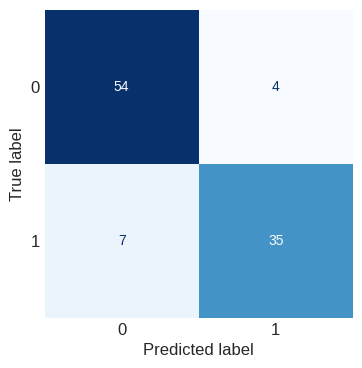

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1])

fig, ax = plt.subplots(figsize=(4,4))

disp.plot(ax = ax, cmap='Blues', colorbar=False);
ax.grid(False);